In [274]:
import cv2

import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize
from tqdm import tqdm

In [275]:
SUPER = "/media/takuya/ボリューム/M2/result/2022_04_10/"
IMG_DIR = "/media/takuya/ボリューム1/M2/original/2022_04_10/rbi_q_1/C001H001S0001/"
IN_DIR = SUPER + "ptv/nearest_skip_5/rbi_q_1/1/"
OUT_DIR = SUPER + "post/img/rbi_q_1/1/"

  0%|          | 0/1 [00:00<?, ?it/s]

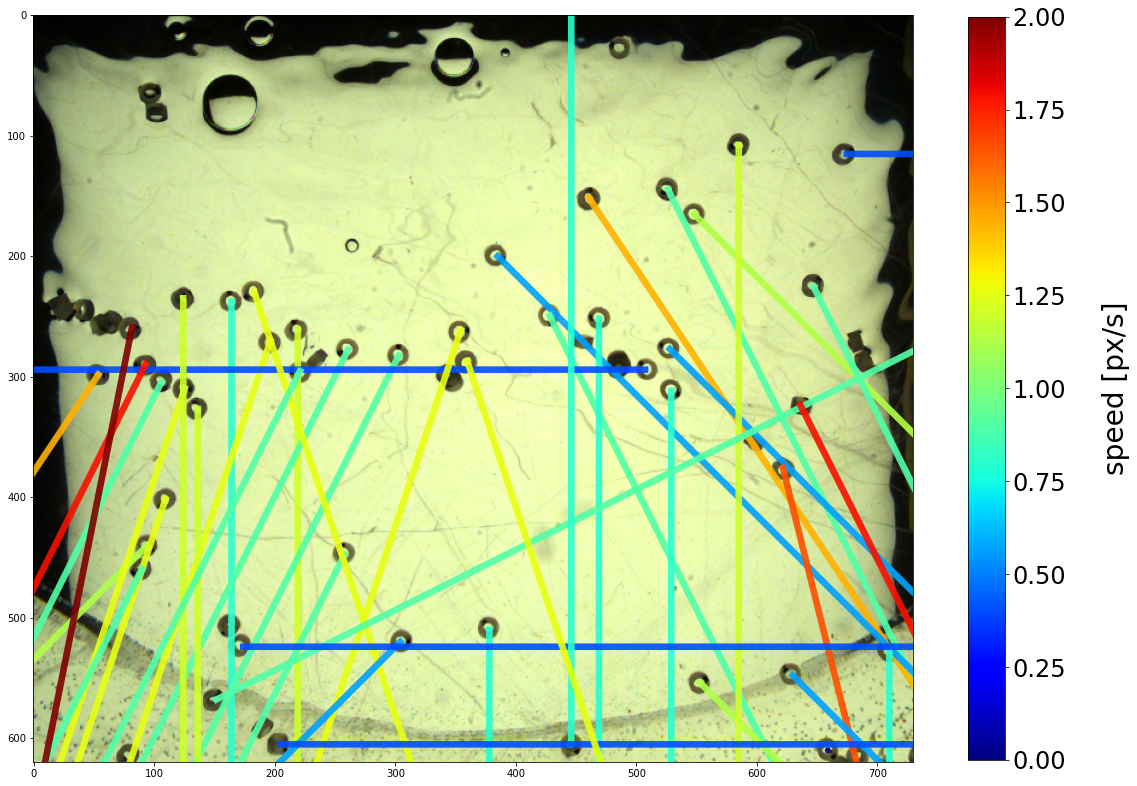

100%|██████████| 1/1 [00:00<00:00,  1.60it/s]


<Figure size 432x288 with 0 Axes>

In [277]:
for i in tqdm(range(3000, 3001)):
    try:
        data = np.loadtxt(IN_DIR + f"{i:06}.csv", delimiter=',', skiprows=1)

        if data.ndim == 1:
            if len(data) > 0:
                data = data[np.newaxis, :]
            else:
                continue
        elif data.ndim == 2:
            pass
        else:
            continue

        img = cv2.imread(IMG_DIR + f"C001H001S0001{i:06}.bmp")
        img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img_trim = img_rgb[290:910, 90:820]

        fig, ax = plt.subplots(figsize=(16, 16))
        fig.tight_layout()
        cmap = plt.cm.get_cmap("jet")
        image = ax.imshow(img_trim)
        for j in range(data.shape[0]):
            c = np.sqrt(data[j][2] ** 2 + data[j][3] ** 2)
            c = c / 5
            p = ax.quiver(data[j][0]+10, data[j][1]+10, data[j][2], data[j][3], color=cmap(c, alpha=0.9), angles='xy', scale_units='xy', scale=0.05)
        pp = fig.colorbar(plt.cm.ScalarMappable(norm=Normalize(vmin=0, vmax=2), cmap=cmap), ax=ax, shrink=0.67)
        for t in pp.ax.get_yticklabels():
            t.set_fontsize(24)
        pp.set_label('\nspeed [px/s]', fontsize=28)
        plt.show()
        # plt.savefig(OUT_DIR + f"{i}.png", dpi=100)

        plt.cla()
        plt.clf()

    except OSError as e:
        continue